---
title: "05-双变量作图"
author: "Simon Zhou"
date: "2025-05-05"
format: 
    html:
        code-fold: true
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 2
---

In [1]:
import stata_setup
stata_setup.config('C:/Program Files/Stata18', 'mp', splash=False)

# scatt plots(散点图)

散点图是一种用于可视化两个变量之间关系的图形。它通过在二维坐标系中绘制点来表示数据点的位置，横轴和纵轴分别表示两个变量的值。散点图可以帮助我们识别变量之间的相关性、趋势和异常值。 

散点图通常用于探索性数据分析（EDA）阶段。

In [2]:
%%stata
// 载入数据集，使用 Stata 的内置数据集 auto.dta
sysuse auto, clear


. // 载入数据集，使用 Stata 的内置数据集 auto.dta
. sysuse auto, clear
(1978 automobile data)

. 


## Stata的scheme（主题）

Stata提供了多种 scheme （style）来美化图形。可以使用`set scheme`命令来设置主题。以下是一些常用的主题：

- `s1color`：适用于需要强调数据点的情况，具有鲜艳的颜色。
- `s2color`：默认主题，适用于需要强调数据点的情况。
- `s1mono`：单色主题，适用于打印或黑白显示。
- `s2mono`：单色主题，适用于强调数据点的情况。
- `economist`：适用于经济学和社会科学领域的主题。
- `journal`：适用于学术期刊的主题，具有简洁和专业的外观。
- `s1manual`：手动主题，适用于需要自定义颜色和样式的情况。
- `s2manual`：手动主题，适用于强调数据点的情况。
- `s2color8`：适用于需要强调数据点的情况，具有8种颜色的主题。
- `plotplain`：适用于需要强调数据点的情况，具有简单和清晰的外观。

更好的主题？

`simono`：适用于需要强调数据点的情况，具有简洁和专业的外观。

### scheme 的设置

`set scheme s1mono` : 当前会话中设置主题为`s1mono`。

`set scheme s1mono, perm` : 永久设置主题为`s1mono`, `perm` 为 `permanent` 的缩写。

## scatter命令

`scatter`命令用于绘制散点图。基本语法如下：

```stata
[twoway] scatter yvar xvar [if] [in] [weight] [, options]
```

最基础的形式：

```stata
twoway scatter yvar xvar
```

进阶形式：

```stata
twoway scatter y1 y2 y3 x1 x2 x3 [if] [in] [weight], options
```


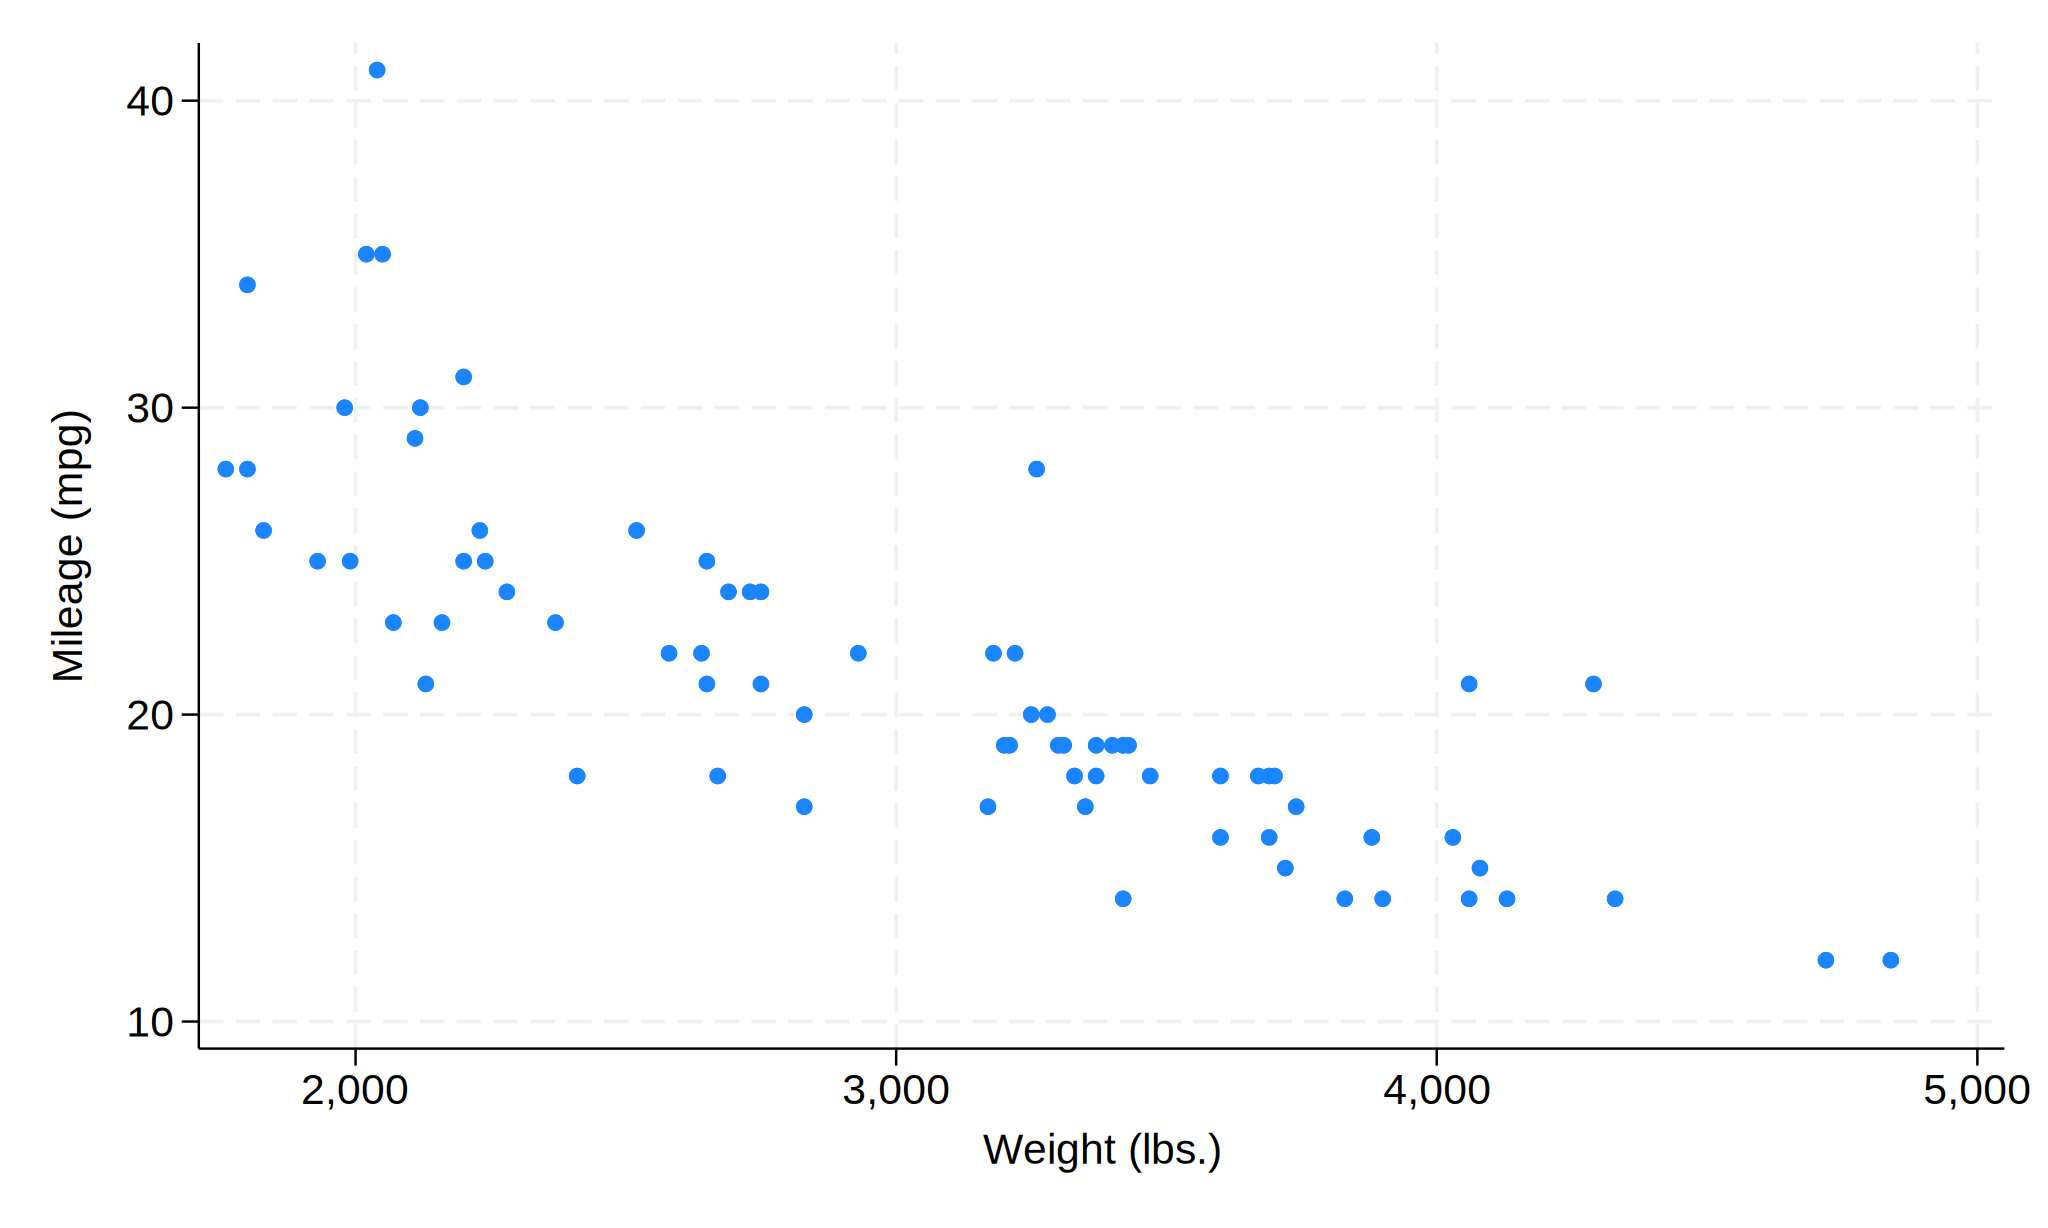

In [4]:
%%stata
twoway scatter mpg weight

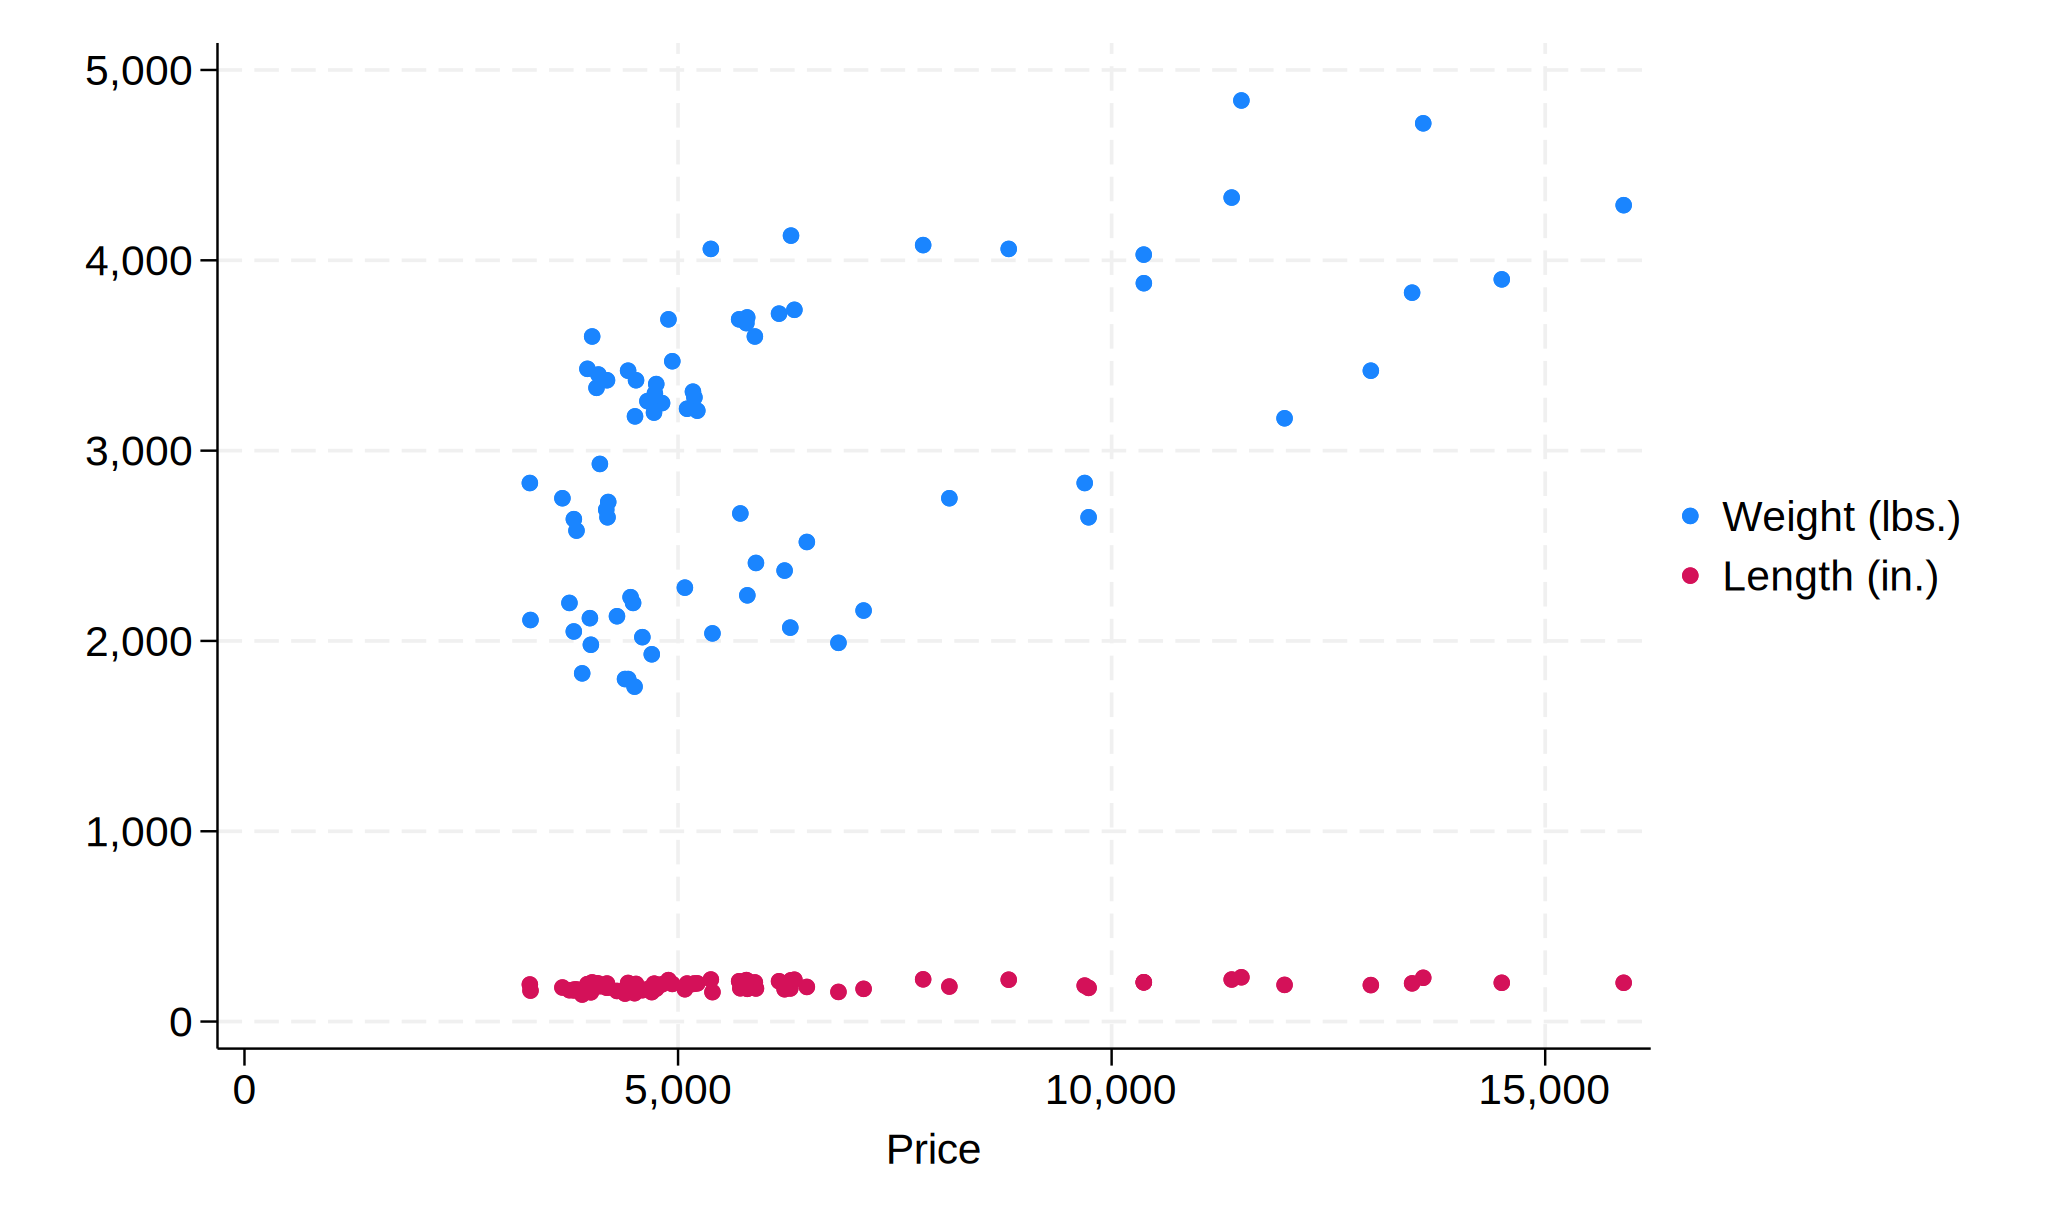

In [5]:
%%stata
twoway scatter weight length price

### 改变散点图的样式

```stata
twoway scatter y x,msymbol(oh) mcolor(red) msize(medium) scheme(s1mono)
```

- `msymbol`:改变形状(`help symbolstyle`)
- `mcolor`:改变颜色(`help colorstyle`)
- `msize`:改变大小(`help markerstyle`)

In [8]:
%%stata
help symbolstyle


[G-4] symbolstyle -- Choices for the shape of markers
                     (View complete PDF manual entry)


Syntax
------

                        Synonym
        symbolstyle     (if any)     Description
        -------------------------------------------------------
        circle             O         solid
        diamond            D         solid
        triangle           T         solid
        square             S         solid
        plus               +
        X                  X
        arrowf             A         filled arrow head
        arrow              a
        pipe               |
        V                  V

        smcircle           o         solid
        smdiamond          d         solid
        smsquare           s         solid
        smtriangle         t         solid
        smplus
        smx                x
        smv                v

        circle_hollow      Oh        hollow
        diamond_hollow     Dh        hollow
        triangle_hollo

In [12]:
%%stata
help colorstyle


[G-4] colorstyle -- Choices for color
                    (View complete PDF manual entry)


Syntax
------

    Set color of <object> to colorstyle

        <object>color(colorstyle)


    Set color of all affected objects to colorstyle

        color(colorstyle)


    Set opacity of <object> to #, where # is a percentage of 100% opacity

        <object>color(%#)


    Set opacity for all affected objects colors to #

        color(%#)


    Set both color and opacity of <object>

        <object>color(colorstyle%#)


    Set both color and opacity of all affected objects

        <object>color(colorstyle%#)


    colorstyle            Description
    -------------------------------------------------------------------------
    black                 

    stc1                  color used by scheme stcolor
    stc2                  color used by scheme stcolor
    .                     
    .                     
    stc15                 color used by scheme stcolor
    stblue       

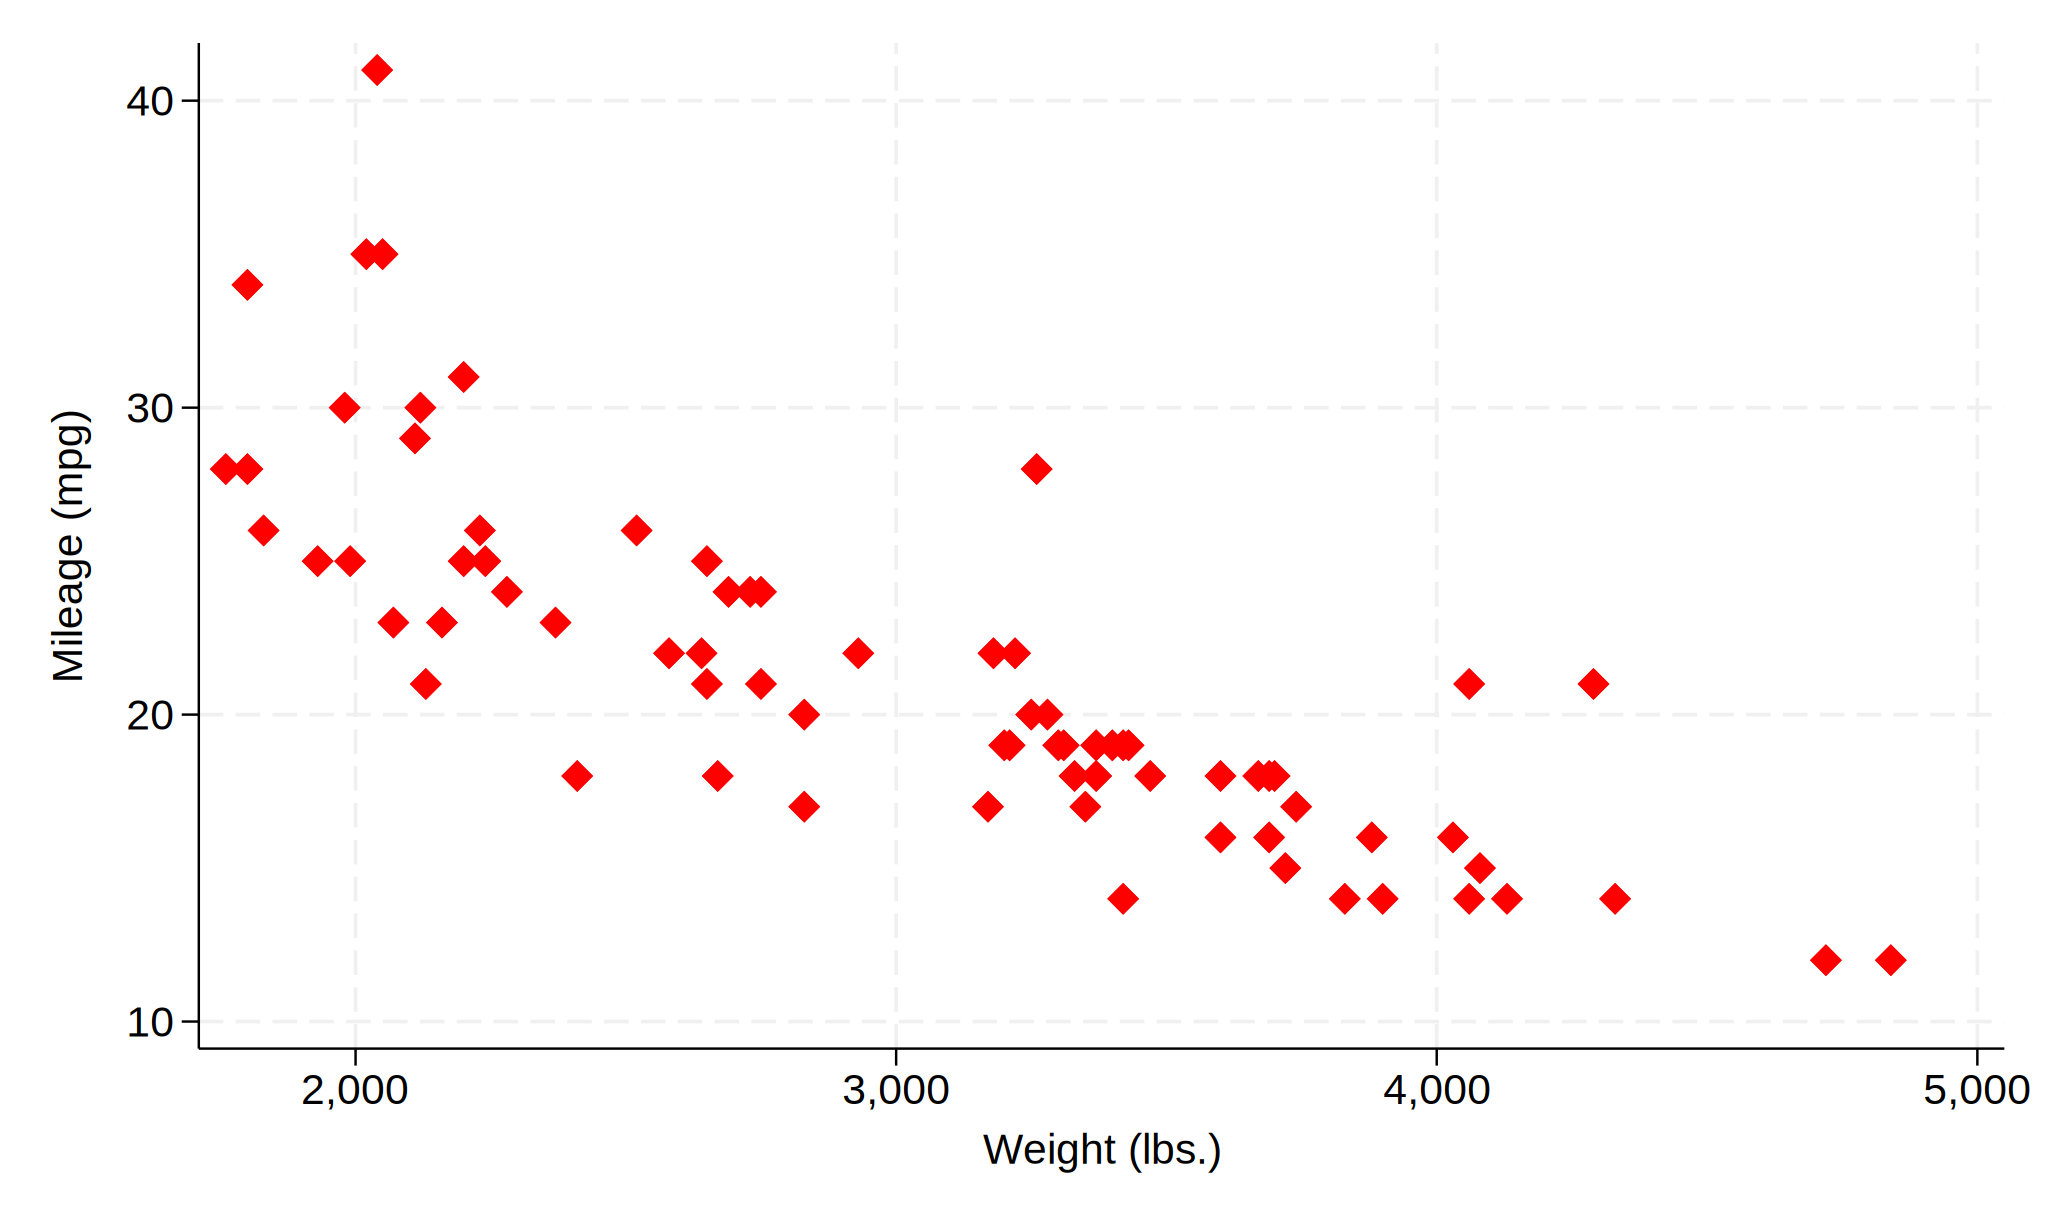

In [14]:
%%stata
twoway scatter mpg weight,msymbol(D) mcolor(red) msize(medium)

## Option: by

按照某个变量分组绘制散点图，可以使用`by`选项。`by`选项可以将数据按照指定变量进行分组，并为每个组绘制单独的散点图。

```stata
twoway scatter y x, by(groupvar)
```

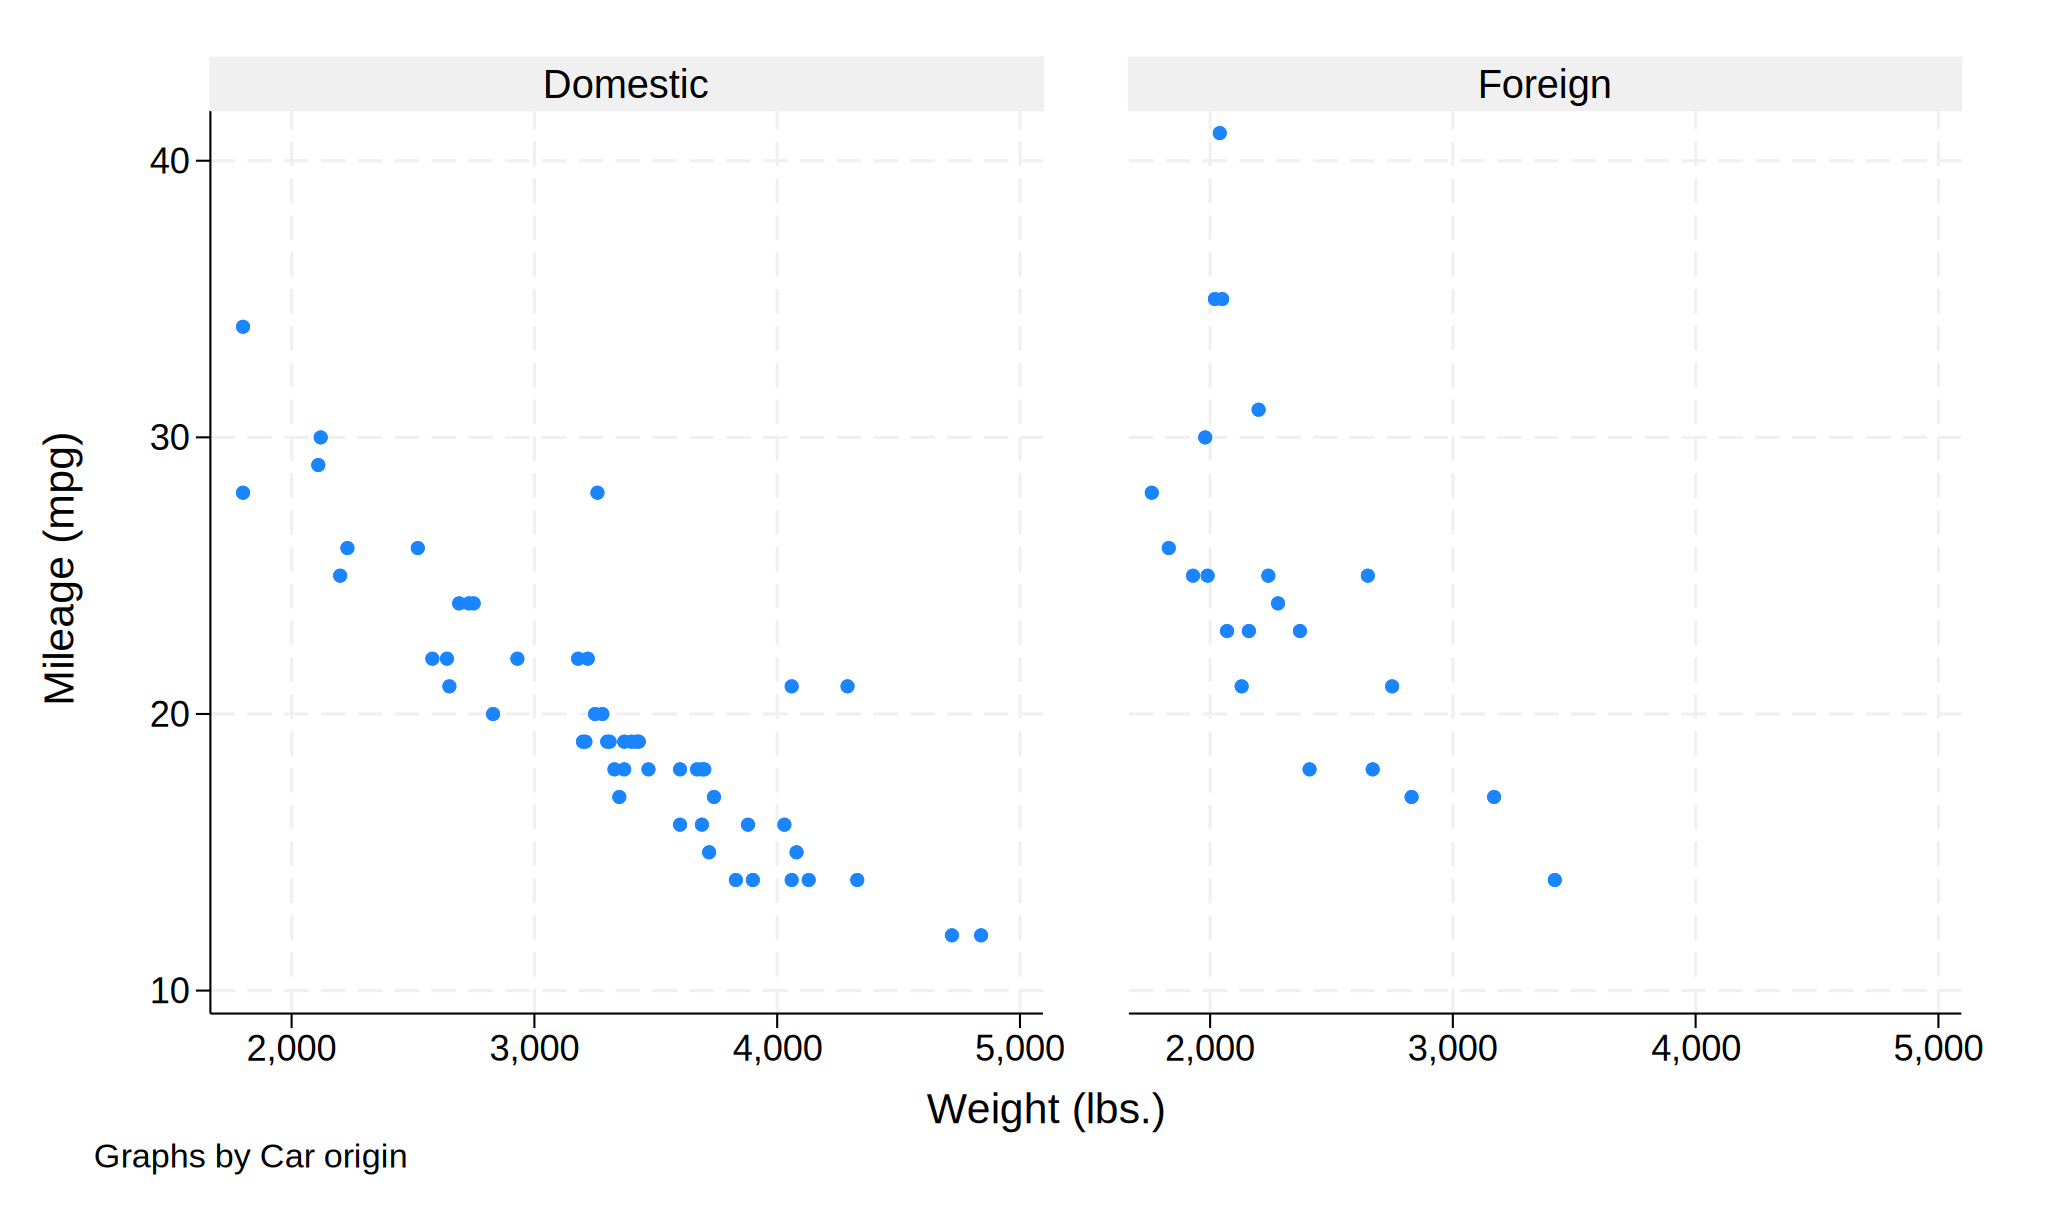

In [15]:
%%stata
twoway scatter mpg weight,by(foreign)

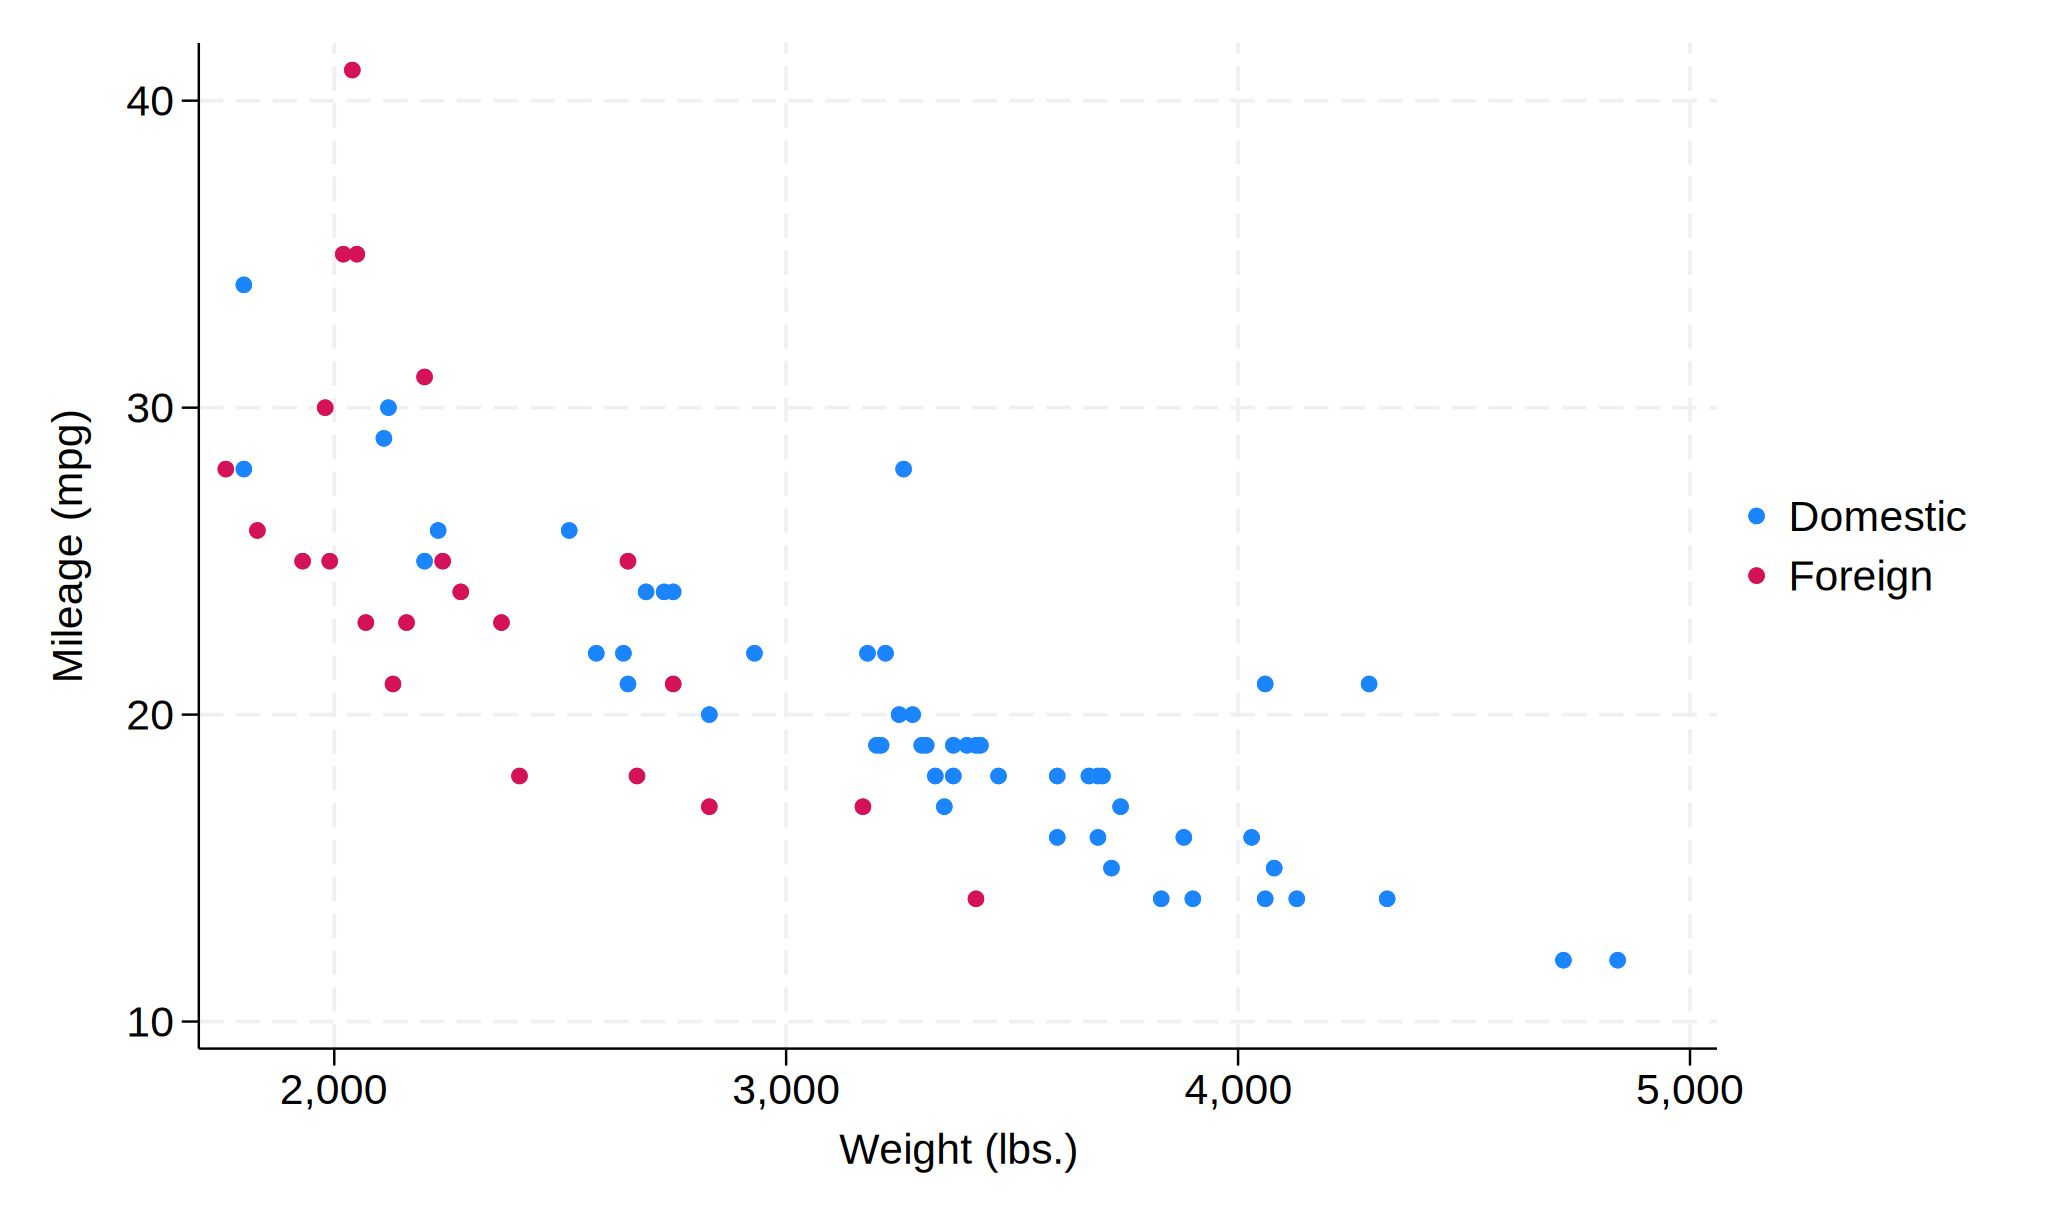

In [18]:
%%stata
twoway(scatter mpg weight if foreign ==0)(scatter mpg weight if foreign ==1),legend(label(1 "Domestic") label(2 "Foreign"))

# 平滑曲线

平滑曲线可以用来描述数据的变化趋势或者揭示数据中的隐藏模式。

在Stata中，绘制光滑曲线的命令主要有以下几种：`lowess`、`loess`、`lowess2`、`lpoly`和`bspline`。它们各自具有不同的特点和适用范围，可以根据具体的数据类型和分析目的选择使用。

lowess是一种局部加权回归平滑方法，它可以通过对数据集进行局部加权回归来生成光滑曲线。

## lowess命令的语法：

```stata
lowess yvar xvar [if] [in] [, options]
```

其中，`yvar` 是因变量，`xvar` 是自变量。`options` 是一些可选参数，用来进一步调整光滑曲线的形状和拟合效果。例如，可以通过指定 `span` 参数来控制局部回归的窗口大小，较小的 `span` 值会导致更平滑的曲线，而较大的 `span` 值会导致更接近原始数据的曲线。

`options` 有如下选项：

![Lowess-syntax](images/lowess-main.png)

`lowess` 命令生成的光滑曲线可以通过绘图命令来展示，例如使用 `twoway scatter` 命令可以在散点图上叠加绘制光滑曲线。[lowess — Lowess smoothing](https://www.stata.com/manuals14/rlowess.pdf)


## `lowess` 命令的示例：


. sysuse auto
(1978 automobile data)

. lowess mpg weight, gen(lowess_mpg)



. twoway scatter mpg weight || line lowess_mpg weight

. 


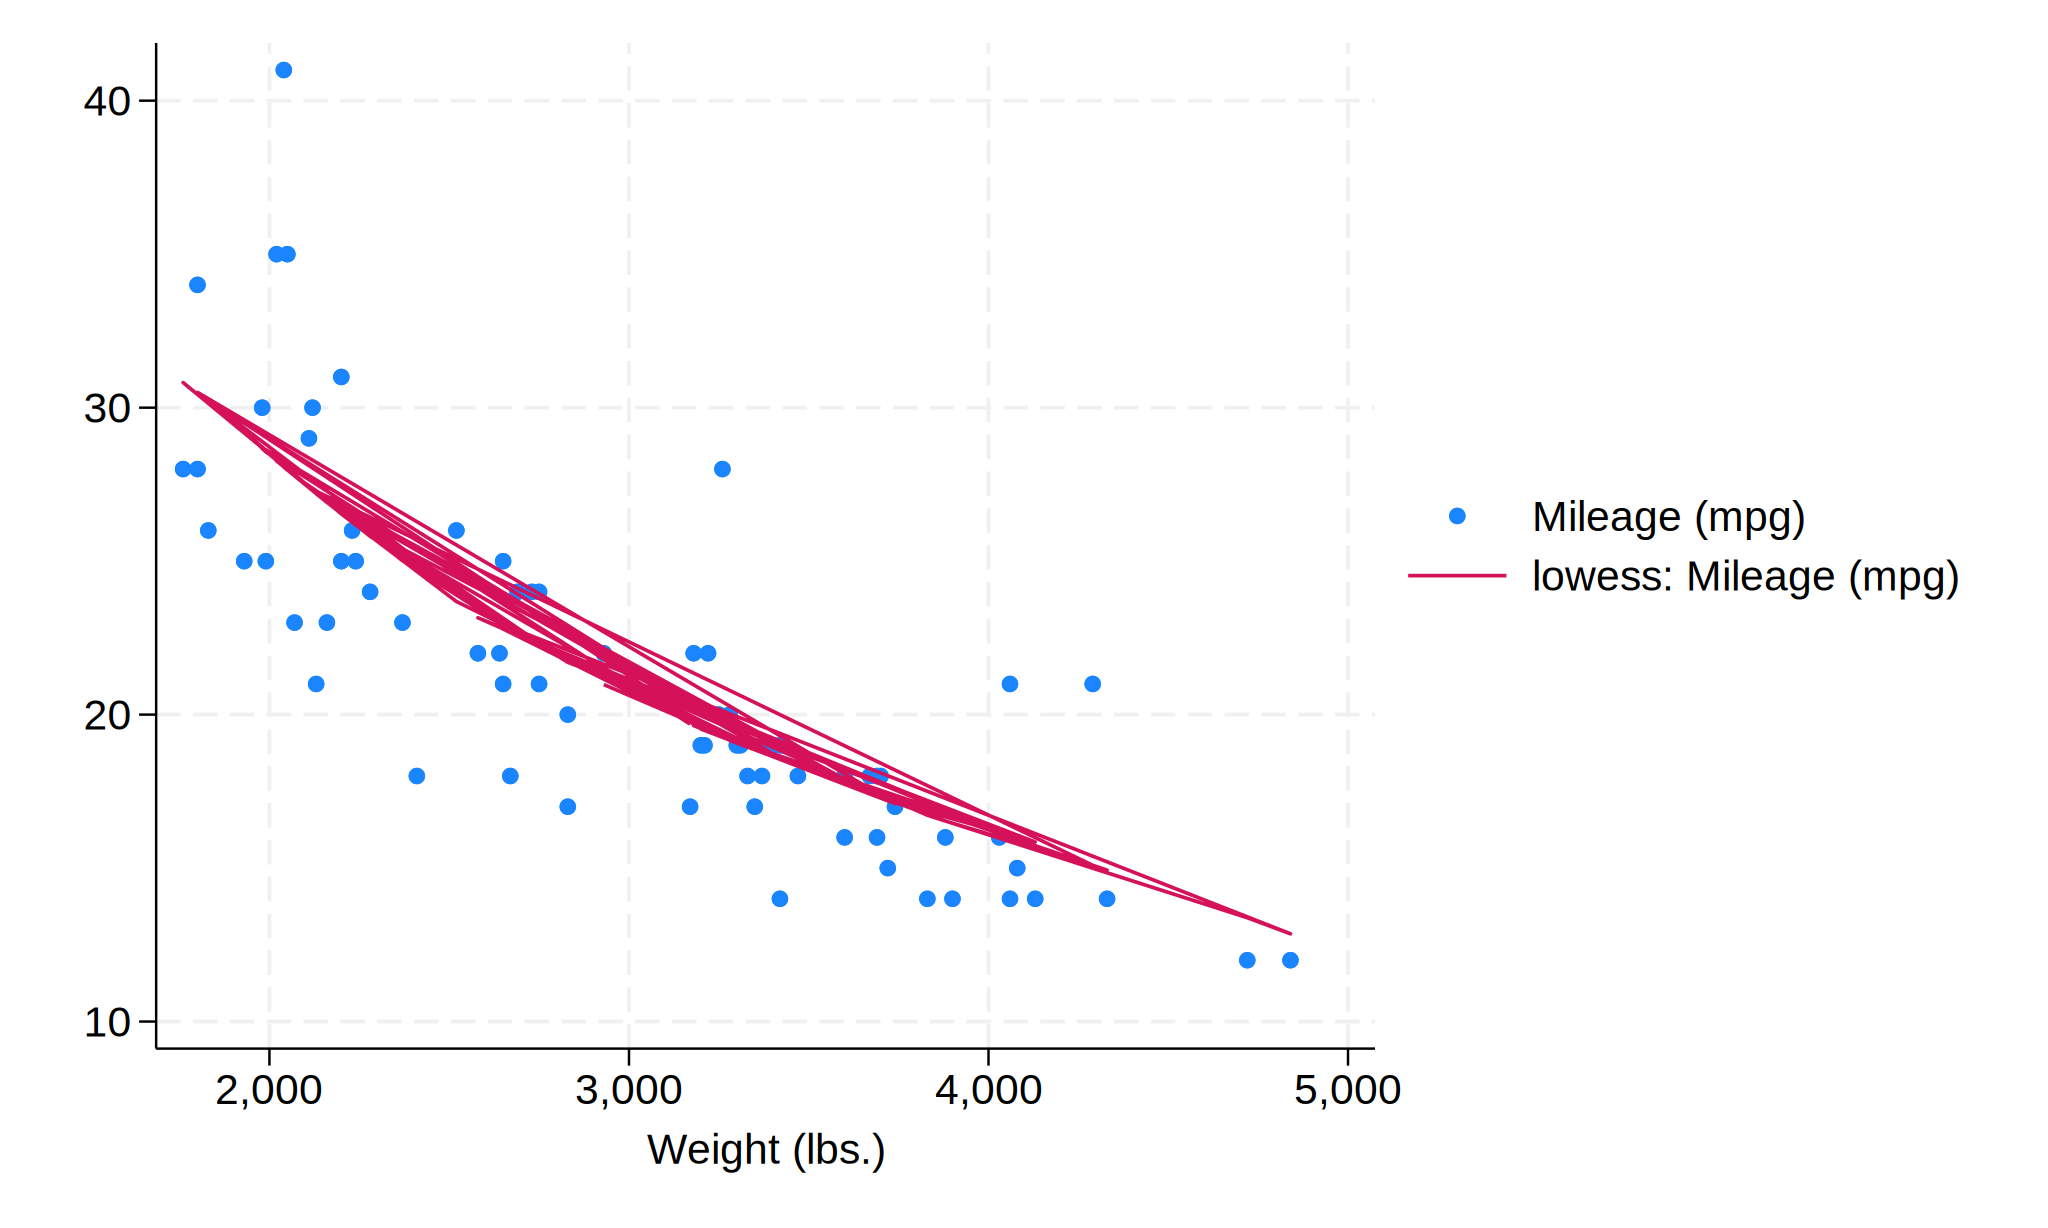

In [3]:
%%stata
sysuse auto
lowess mpg weight, gen(lowess_mpg)
twoway scatter mpg weight || line lowess_mpg weight

上述代码首先载入Stata自带的汽车数据集auto，然后使用lowess命令生成一个光滑曲线，将结果保存在变量lowess_mpg中。最后利用twoway scatter命令绘制散点图，并使用line命令在散点图上叠加绘制光滑曲线。